<a href="https://colab.research.google.com/github/5arim/Time-Series-Analysis-of-Ethereum-ETH-USDT-Market-Projections-using-ARIMA/blob/main/Time_Series_Analysis_of_Ethereum_(ETH_USDT)_Market_Projections_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Load the Kaggle dataset
eth_data = pd.read_csv('coin_Ethereum.csv', parse_dates=['Date'], index_col='Date')

# Select relevant columns
eth_data = eth_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']]

# Remove time from index (keep only date)
eth_data.index = eth_data.index.date
eth_data.index = pd.to_datetime(eth_data.index)

# Set daily frequency and forward-fill any missing dates
eth_data = eth_data.asfreq('D', method='ffill')

# Ensure numerical columns are floats
eth_data = eth_data.astype(float)

# Check data details
print("Data Source: Kaggle (Cryptocurrency Historical Prices)")
print("Date Range:", eth_data.index.min(), "to", eth_data.index.max())
print("Missing values:\n", eth_data.isna().sum())
print("First few rows:\n", eth_data.head())

# Save processed data for submission
eth_data.to_csv('eth_kaggle_processed.csv')


Data Source: Kaggle (Cryptocurrency Historical Prices)
Date Range: 2015-08-08 00:00:00 to 2021-07-06 00:00:00
Missing values:
 Open         0
High         0
Low          0
Close        0
Volume       0
Marketcap    0
dtype: int64
First few rows:
                 Open      High       Low     Close     Volume     Marketcap
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0  4.548689e+07
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0  4.239957e+07
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0  4.281836e+07
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0  6.456929e+07
2015-08-12  1.058750  1.289940  0.883608  1.217440  2150620.0  7.364501e+07


Columns in eth_kaggle_processed.csv: ['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
Data Source: Kaggle (Cryptocurrency Historical Prices)
Date Range: 2015-08-08 00:00:00 to 2021-07-06 00:00:00
Missing values:
 Open         0
High         0
Low          0
Close        0
Volume       0
Marketcap    0
dtype: int64
First few rows:
                 Open      High       Low     Close     Volume     Marketcap
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0  4.548689e+07
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0  4.239957e+07
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0  4.281836e+07
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0  6.456929e+07
2015-08-12  1.058750  1.289940  0.883608  1.217440  2150620.0  7.364501e+07


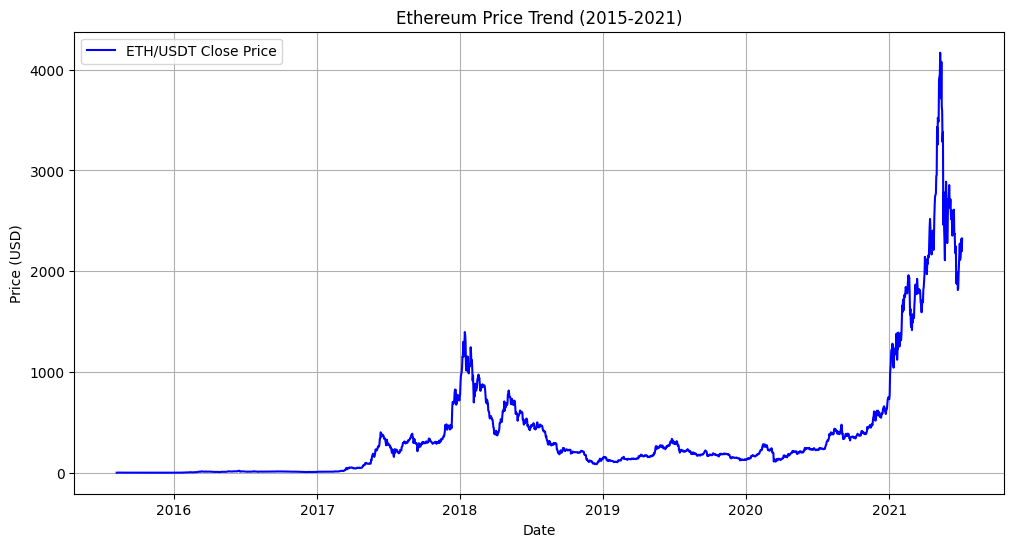

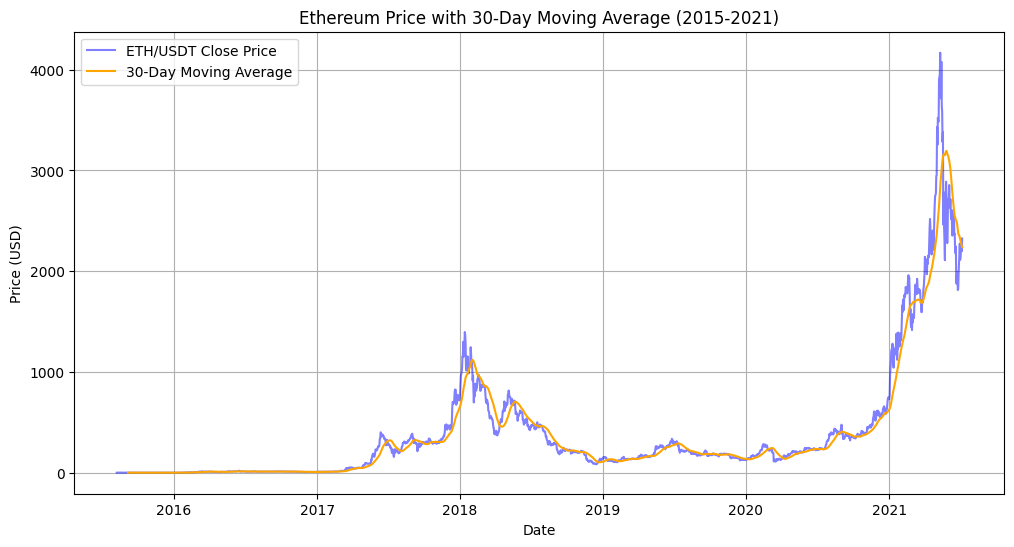

Statistical Summary of Ethereum Data:
             Close        Volume     Marketcap
count  2160.000000  2.160000e+03  2.160000e+03
mean    383.910691  7.057058e+09  4.172084e+10
std     601.078766  1.064526e+10  6.909184e+10
min       0.434829  1.021280e+05  3.221363e+07
25%      13.819200  3.825102e+07  1.135576e+09
50%     198.643691  2.148880e+09  2.070063e+10
75%     386.435272  9.629136e+09  4.231010e+10
max    4168.701049  8.448291e+10  4.828819e+11


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the file exists and inspect its columns
try:
    # Load the processed Kaggle dataset
    eth_data = pd.read_csv('eth_kaggle_processed.csv')

    # Print column names to debug
    print("Columns in eth_kaggle_processed.csv:", eth_data.columns.tolist())

    # If 'Date' is a column, set it as index; otherwise, assume index is unnamed
    if 'Date' in eth_data.columns:
        eth_data['Date'] = pd.to_datetime(eth_data['Date'])
        eth_data.set_index('Date', inplace=True)
    else:
        # Assume the first column is the date index
        eth_data = pd.read_csv('eth_kaggle_processed.csv', parse_dates=[0], index_col=0)

    # Ensure numerical columns are floats
    eth_data = eth_data.astype(float)

    # Verify data
    print("Data Source: Kaggle (Cryptocurrency Historical Prices)")
    print("Date Range:", eth_data.index.min(), "to", eth_data.index.max())
    print("Missing values:\n", eth_data.isna().sum())
    print("First few rows:\n", eth_data.head())

    # Plot 1: Closing price trend
    plt.figure(figsize=(12, 6))
    plt.plot(eth_data['Close'], label='ETH/USDT Close Price', color='blue')
    plt.title('Ethereum Price Trend (2015-2021)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig('eth_price_trend.png')  # Save for submission
    plt.show()

    # Plot 2: Closing price with 30-day moving average
    eth_data['Close_30d_MA'] = eth_data['Close'].rolling(window=30).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(eth_data['Close'], label='ETH/USDT Close Price', color='blue', alpha=0.5)
    plt.plot(eth_data['Close_30d_MA'], label='30-Day Moving Average', color='orange')
    plt.title('Ethereum Price with 30-Day Moving Average (2015-2021)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig('eth_price_30d_ma.png')  # Save for submission
    plt.show()

    # Statistical summary
    print("Statistical Summary of Ethereum Data:")
    print(eth_data[['Close', 'Volume', 'Marketcap']].describe())

except FileNotFoundError:
    print("Error: 'eth_kaggle_processed.csv' not found. Please ensure the file exists in your working directory.")
except Exception as e:
    print(f"Unexpected error: {e}")

Stationarity Test for Close Price:
ADF Statistic: -0.026066281130866977
p-value: 0.9563225993836114
Critical Values: {'1%': np.float64(-3.433419473570619), '5%': np.float64(-2.862895974588963), '10%': np.float64(-2.5674918550982277)}
Data is non-stationary (p > 0.05). Differencing may be needed.

Stationarity Test for Differenced Close Price:
ADF Statistic: -9.806603997470926
p-value: 5.803725004405122e-17
Critical Values: {'1%': np.float64(-3.433419473570619), '5%': np.float64(-2.862895974588963), '10%': np.float64(-2.5674918550982277)}
Data is stationary (p <= 0.05).

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2160
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11393.301
Date:                Thu, 26 Jun 2025   AIC                          22798.602
Time:                        14:17:12   BIC                          22832.667
Sample:

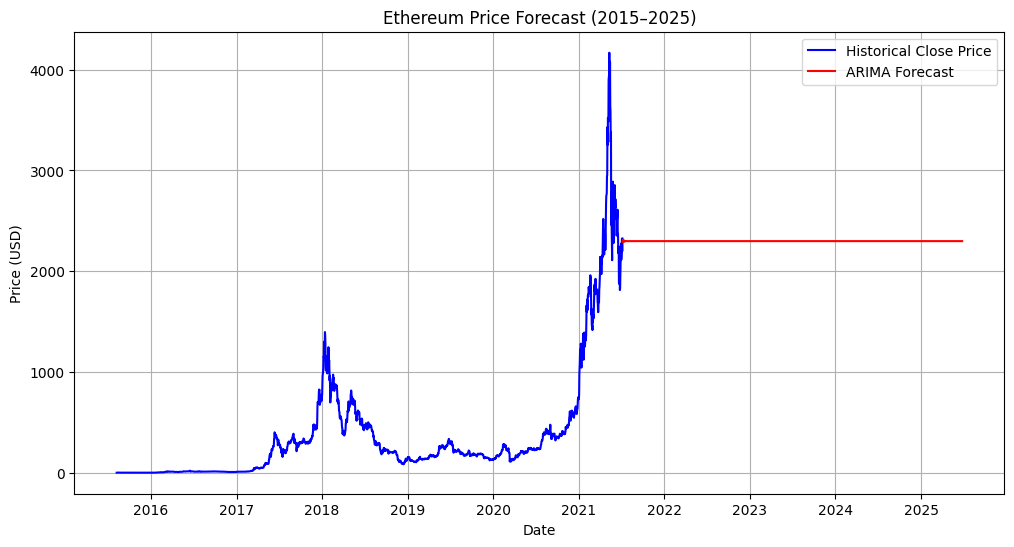


Forecast Data (first 5 rows):
                 Date  Forecast_Close
2021-07-07 2021-07-07     2297.141347
2021-07-08 2021-07-08     2307.754870
2021-07-09 2021-07-09     2291.348444
2021-07-10 2021-07-10     2312.633797
2021-07-11 2021-07-11     2293.828563


In [14]:
# Load the processed Kaggle dataset
try:
    eth_data = pd.read_csv('eth_kaggle_processed.csv', parse_dates=[0], index_col=0)
    eth_data = eth_data.astype(float)
except FileNotFoundError:
    print("Error: 'eth_kaggle_processed.csv' not found. Please ensure the file exists.")
    exit()

# Check stationarity with Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("Data is stationary (p <= 0.05).")
    else:
        print("Data is non-stationary (p > 0.05). Differencing may be needed.")

print("Stationarity Test for Close Price:")
adf_test(eth_data['Close'])

# Apply differencing if non-stationary
eth_data['Close_diff'] = eth_data['Close'].diff().dropna()
if adfuller(eth_data['Close'].dropna())[1] > 0.05:
    print("\nStationarity Test for Differenced Close Price:")
    adf_test(eth_data['Close_diff'].dropna())
    series_to_model = eth_data['Close_diff'].dropna()
else:
    series_to_model = eth_data['Close']

# Fit ARIMA model (order=(5,1,0) as a starting point)
model = ARIMA(eth_data['Close'], order=(5, 1, 0))
model_fit = model.fit()
print("\nARIMA Model Summary:")
print(model_fit.summary())

# Forecast from July 7, 2021, to June 26, 2025 (1450 days)
forecast_steps = 1450
forecast = model_fit.forecast(steps=forecast_steps)

# Create date range for forecast
last_date = eth_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='Historical Close Price', color='blue')
plt.plot(forecast_series, label='ARIMA Forecast', color='red')
plt.title('Ethereum Price Forecast (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('eth_arima_forecast.png')  # Save for submission
plt.show()

# Save forecast data
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Close': forecast})
forecast_df.to_csv('eth_arima_forecast.csv', index=False)
print("\nForecast Data (first 5 rows):")
print(forecast_df.head())

Test RMSE: 1319.247466833785


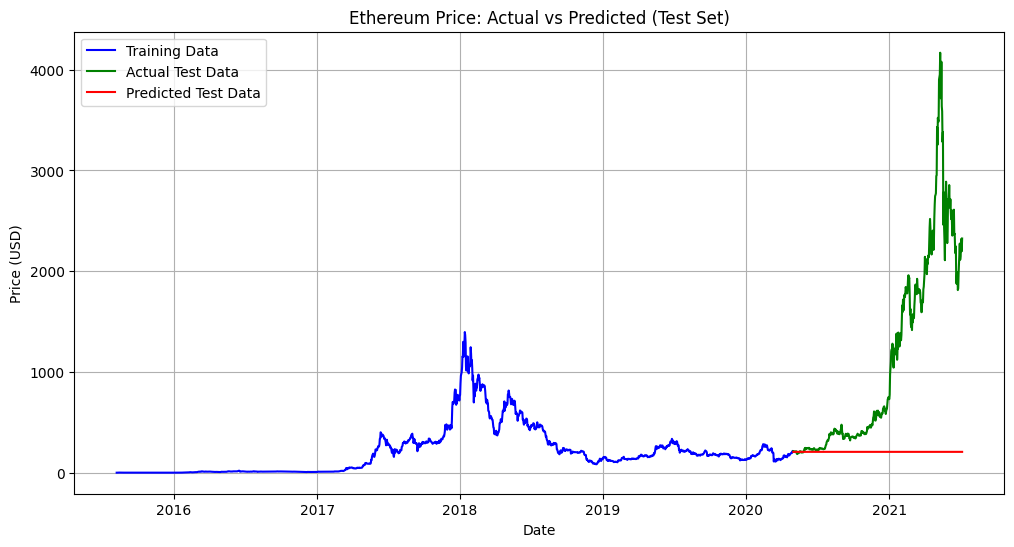

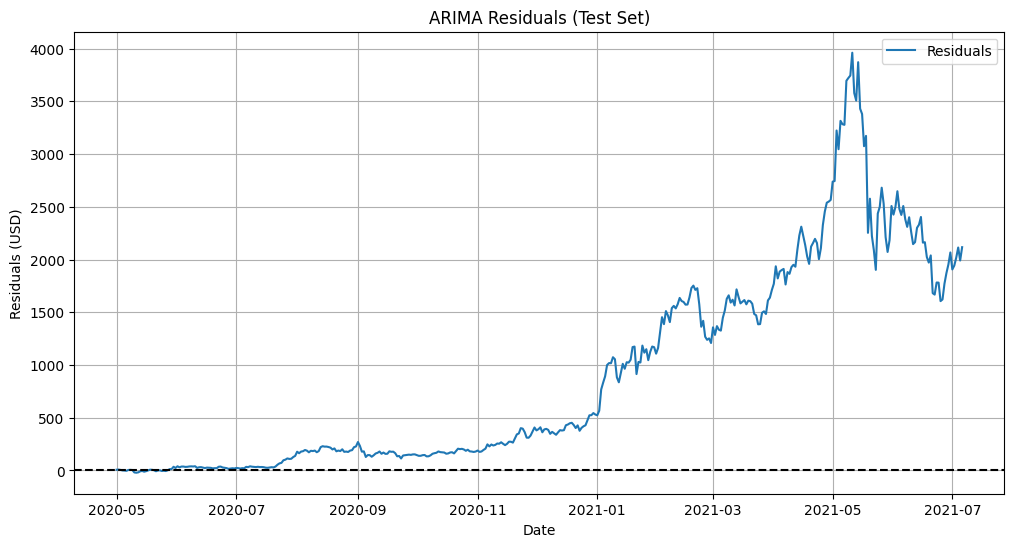

<Figure size 1200x600 with 0 Axes>

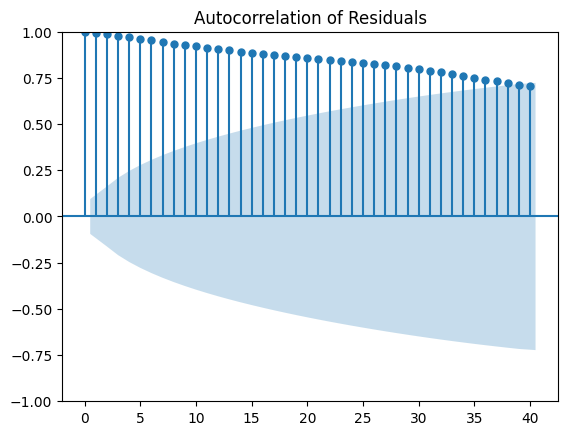

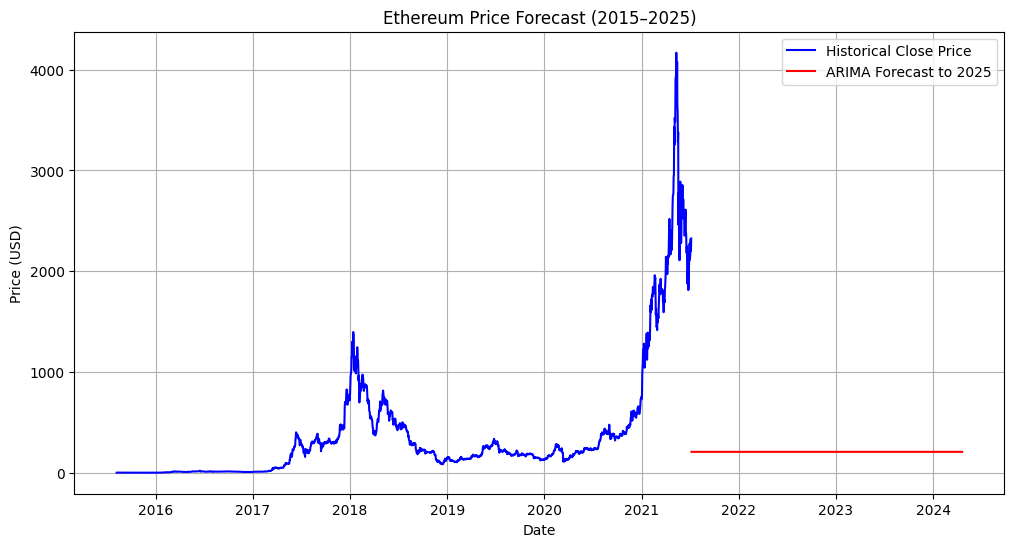


Forecast Data (first 5 rows):
                 Date  Forecast_Close
2020-05-01 2021-07-07      207.235397
2020-05-02 2021-07-08      207.459662
2020-05-03 2021-07-09      206.212878
2020-05-04 2021-07-10      208.222531
2020-05-05 2021-07-11      207.611363


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the processed Kaggle dataset
try:
    eth_data = pd.read_csv('eth_kaggle_processed.csv', parse_dates=[0], index_col=0)
    eth_data = eth_data.astype(float)
except FileNotFoundError:
    print("Error: 'eth_kaggle_processed.csv' not found. Please ensure the file exists.")
    exit()

# Split data into training (80%) and testing (20%)
train_size = int(len(eth_data) * 0.8)
train_data = eth_data['Close'][:train_size]
test_data = eth_data['Close'][train_size:]

# Fit ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Predict on test set
test_forecast = model_fit.forecast(steps=len(test_data))
test_forecast = pd.Series(test_forecast, index=test_data.index)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, test_forecast))
print("Test RMSE:", rmse)

# Plot actual vs predicted on test set
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(test_forecast, label='Predicted Test Data', color='red')
plt.title('Ethereum Price: Actual vs Predicted (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('eth_arima_test_forecast.png')  # Save for submission
plt.show()

# Check residuals
residuals = test_data - test_forecast
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('ARIMA Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residuals (USD)')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.savefig('eth_arima_residuals.png')  # Save for submission
plt.show()

# Plot ACF of residuals to check randomness
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, title='Autocorrelation of Residuals')
plt.savefig('eth_arima_residuals_acf.png')  # Save for submission
plt.show()

# Forecast to June 26, 2025 (confirming previous forecast)
forecast_steps = 1450
forecast = model_fit.forecast(steps=forecast_steps)
last_date = eth_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot full historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='Historical Close Price', color='blue')
plt.plot(forecast_series, label='ARIMA Forecast to 2025', color='red')
plt.title('Ethereum Price Forecast (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('eth_arima_forecast_final.png')  # Save for submission
plt.show()

# Save forecast data
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Close': forecast})
forecast_df.to_csv('eth_arima_forecast_final.csv', index=False)
print("\nForecast Data (first 5 rows):")
print(forecast_df.head())

In [16]:
import os
import shutil

# Create a directory for submission
submission_dir = 'eth_arima_submission'
if not os.path.exists(submission_dir):
    os.makedirs(submission_dir)

# List of files to include
files_to_copy = [
    'coin_Ethereum.csv',           # Original Kaggle dataset
    'eth_kaggle_processed.csv',   # Processed dataset
    'eth_arima_forecast_final.csv', # Forecast data
    'eth_price_trend.png',        # EDA plot
    'eth_price_30d_ma.png',       # EDA plot with moving average
    'eth_arima_test_forecast.png', # Test set predictions
    'eth_arima_residuals.png',    # Residuals plot
    'eth_arima_residuals_acf.png',# Residuals ACF plot
    'eth_arima_forecast_final.png' # Final forecast plot
]

# Copy files to submission directory
for file in files_to_copy:
    if os.path.exists(file):
        shutil.copy(file, os.path.join(submission_dir, file))
        print(f"Copied {file} to {submission_dir}")
    else:
        print(f"Warning: {file} not found. Ensure it was generated.")

print(f"\nSubmission files are in '{submission_dir}'. Upload this folder to your GitHub repository.")

Copied coin_Ethereum.csv to eth_arima_submission
Copied eth_kaggle_processed.csv to eth_arima_submission
Copied eth_arima_forecast_final.csv to eth_arima_submission
Copied eth_price_trend.png to eth_arima_submission
Copied eth_price_30d_ma.png to eth_arima_submission
Copied eth_arima_test_forecast.png to eth_arima_submission
Copied eth_arima_residuals.png to eth_arima_submission
Copied eth_arima_residuals_acf.png to eth_arima_submission
Copied eth_arima_forecast_final.png to eth_arima_submission

Submission files are in 'eth_arima_submission'. Upload this folder to your GitHub repository.
